In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# Load datasets
# df = pd.read_csv('6_7_all_map_emo.csv')
df = pd.read_csv('0_all.csv')

In [4]:
df['Level of Care Needed'].unique()

array([nan, 'First Aid', 'ED', 'Urgent Care', 'Other (please specify)',
       'Unknown'], dtype=object)

In [28]:
# Create mapping dictionary to standardize values
care_mapping = {
    'First Aid': 'First Aid',
    'ED': 'Emergency Department',
    'Urgent Care': 'Urgent Care',
    'Other (please specify)': 'Other',
    'Unknown': np.nan  # Treat unknown as missing
}

# Apply mapping and drop NA
df['Level of Care Needed'] = df['Level of Care Needed'].map(care_mapping).dropna()

In [9]:
df['Level of Care Needed'].value_counts(dropna=True)

,count
Level of Care Needed,
ED,154
Other (please specify),71
Urgent Care,67
First Aid,11
Unknown,1


In [22]:
df['Level of Care Needed'].value_counts(dropna=True)

,count
Level of Care Needed,
Emergency Department,154
Other,71
Urgent Care,67
First Aid,11


In [25]:
df.head()

,Event Date,Facility Type,Department/Office Incident Took Place,Occupational Category of Person Affected,Aggressor,Type of Violence,Primary Contributing Factors,Severity of Assault,Primary Assault Description,Assault Description,...,Response Action Taken,Split Roles,General Role,General Violence_Category,General Location,General Advanced Location,General Severity Category,General Severity Numerical,General Emotional Numerical,General Care Level Numerical
0,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Physical,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,...,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Physical Violence,ED/ER,Clinical Unit,Mild,1.0,1.0,NaN
1,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Verbal,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,...,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Verbal Abuse,ED/ER,Clinical Unit,Mild,1.0,1.0,NaN
2,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Physical,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,...,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Physical Violence,ED/ER,Clinical Unit,Mild,1.0,1.0,NaN
3,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Verbal,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,...,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Verbal Abuse,ED/ER,Clinical Unit,Mild,1.0,1.0,NaN
4,2/6/2024,ED,Patient room,"Nurse (RN, LPN), Security, Allied Health/Techn...",Patient,Physical,"Altered Mental Status, Inpatient Bed Unavailable",None - No Contact/Unwanted Contact w/No Injury,"Grabbing/Pinching/Scratching/Hair Pull, Kickin...",NaN,...,"Security Called, Law Enforcement Called, Physi...","Nurse (RN, LPN)",Nurse,Physical Violence,ED/ER,Clinical Unit,NaN,0.0,0.0,NaN


## Graph

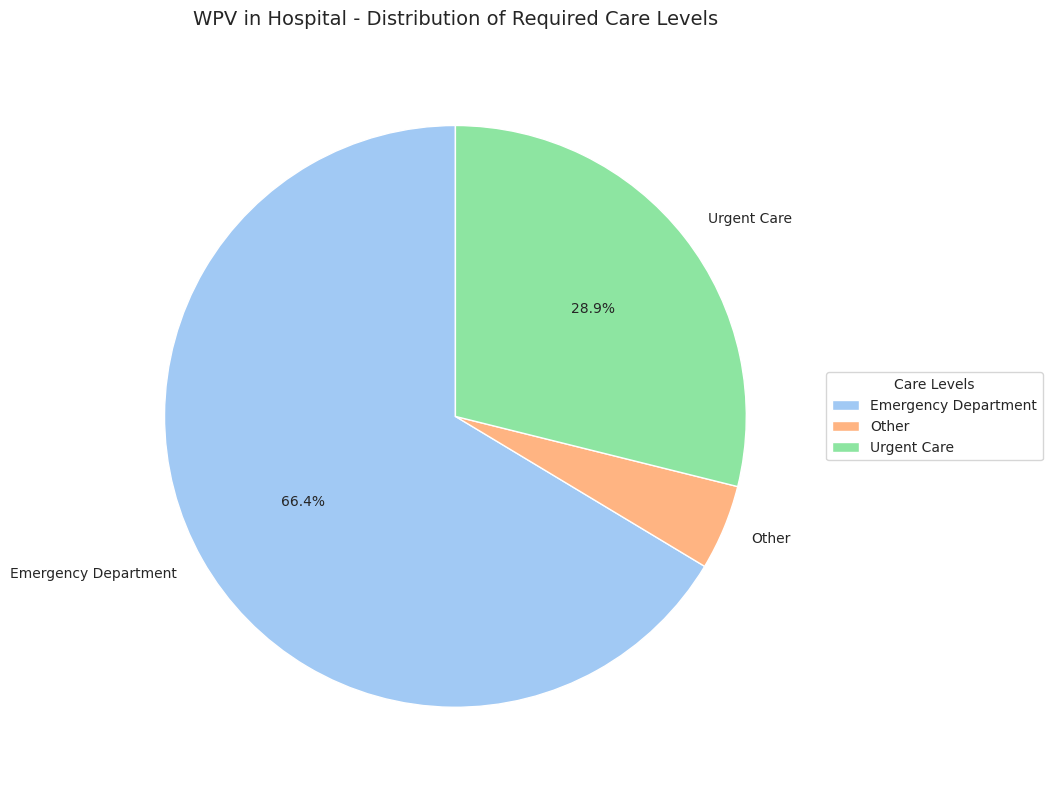

In [16]:
plt.figure(figsize=(10, 8))
sns.set_style("white")

# Count categories and filter small slices
category_counts = df['Level of Care Needed'].value_counts()
min_threshold = 0.05 * category_counts.sum()  # 5% threshold
filtered_counts = category_counts[category_counts > min_threshold]
other_count = category_counts[category_counts <= min_threshold].sum()

# Add "Other" if small categories exist
if other_count > 0:
    filtered_counts["Other"] = other_count

# Custom color palette
colors = sns.color_palette("pastel", len(filtered_counts))

# Create pie chart
plt.pie(
    filtered_counts,
    labels=filtered_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 10}
)

# Add title and legend
plt.title("WPV in Hospital - Distribution of Required Care Levels", fontsize=14, pad=20)
plt.legend(
    filtered_counts.index,
    title="Care Levels",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

<ipython-input-18-6588a645957e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


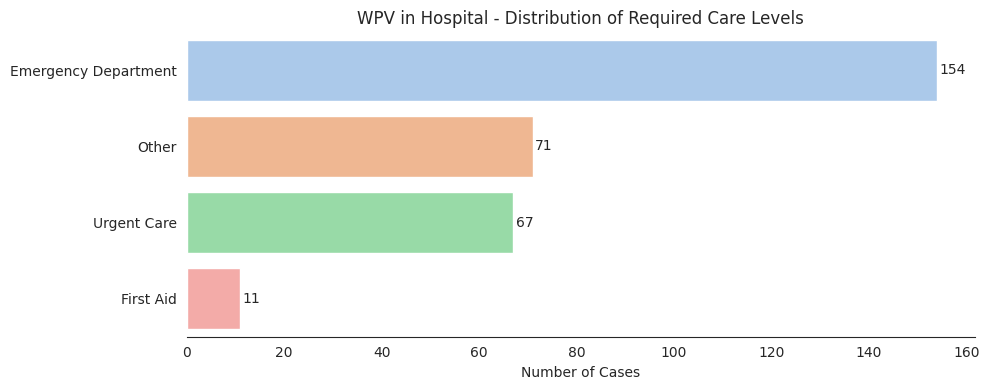

In [18]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(
    y='Level of Care Needed',
    data=df,
    order=df['Level of Care Needed'].value_counts().index,
    palette='pastel'
)

# Add count labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,
            p.get_y() + p.get_height()/2.,
            f'{int(width)}',
            ha='left',
            va='center')

plt.title("WPV in Hospital - Distribution of Required Care Levels")
plt.xlabel("Number of Cases")
plt.ylabel("")
sns.despine(left=True)
plt.tight_layout()
plt.show()

## Map to Number

In [29]:
# Create numerical mapping based on care intensity
care_numerical = {
    'First Aid': 1,
    'Urgent Care': 2,
    'Emergency Department': 3,
    'Other': np.nan  # Could also code as 0 if appropriate
}

df['General Care Level Numerical'] = df['Level of Care Needed'].map(care_numerical)

# Show distribution
print("\nNumerical Distribution:")
print(df['General Care Level Numerical'].value_counts(dropna=False))


Numerical Distribution:
General Care Level Numerical
NaN    1291
3.0     154
2.0      67
1.0       5
Name: count, dtype: int64


In [30]:
# df.to_csv('7_8_all_emo_num.csv', index=False)
df.to_csv('0_8_all_emo_num.csv', index=False)